# Advance Machine Learning for Natural Language Processing and Text Processing 
## Project 2 : Insurance reviews

This dataset contains reviews published by insurance customers. There are different columns : 
- date: it contains the date of the publication of the review and the period of the review
experience, and it has to be cleaned.
- note: it is the number of stars given by the customer (it should be predicted in the test
dataset)
- auteur: the id of the customer
- avis: the review
- assureur: the name of the insurance
- produit: the type of insurance

### Data import and pre-processing

In [87]:
!pip install pandas numpy plotly sklearn stop_words nltk wordcloud seaborn gensim pyLDAvis

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Programs\\Python\\Python38\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'

In [93]:
import pandas as pd
import numpy as np
import plotly.express as plt
import plotly.graph_objects as go
import matplotlib.pyplot as pyplot
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS

from stop_words import get_stop_words
import nltk
from nltk import FreqDist
from nltk.util import ngrams
from nltk.tokenize import TreebankWordTokenizer, word_tokenize
from nltk.stem.snowball import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import LatentDirichletAllocation as LDA

import pyLDAvis
import pyLDAvis.gensim_models
import gensim

from sklearn.cluster import KMeans

C:\Users\cheic\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
d:\programs\python\python38\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cheic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
dataset = pd.read_csv('./dataset/avisassurance_train.csv', sep=";")
dataset.head(10)

,date,note,auteur,avis,assureur,produit
0,06 septem...,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto
1,03 mai 20...,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto
2,21 mars 2...,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto
3,10 juin 2...,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto
4,29 janvie...,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto
5,06 mars 2...,1,spam-62064,"Vente forcée par téléphone, prétextant des évè...",Néoliane Santé,sante
6,05 octobr...,3,ludovic-b-135966,Nouveau client satisfait du prix et des servic...,APRIL,sante
7,17 septem...,1,laetitia741-97523,Un assureur m'a contacté par telephone pour me...,SantéVet,animaux
8,12 janvie...,1,gbernard10-102485,Je ne peux que rejoindre les nombreux avis nég...,Mercer,sante
9,21 mars 2...,1,rezo31-62544,GENERALI ASSURANCES VIE PATRIMOINE Très mauvai...,Generali,vie


In [6]:
def date_format(value): 
    day, month, year = value.lower().strip().split(' ')[:3]

    if month == 'janvier': 
        month = '01'
    elif month == 'février' or month == 'fevrier': 
        month = '02'
    elif month == 'mars': 
        month = '03'
    elif month == 'avril': 
        month = '04'
    elif month == 'mai': 
        month = '05'
    elif month == 'juin': 
        month = '06'
    elif month == 'juillet': 
        month = '07'
    elif month == 'aout' or 'août': 
        month = '08'
    elif month == 'septembre': 
        month = '09'
    elif month == 'octobre': 
        month = '10'
    elif month == 'novembre': 
        month = '11'
    elif month == 'decembre' or 'décembre': 
        month = '12'
        
    return pd.to_datetime(year + "-" + month + "-" + day)

In [7]:
df = dataset.copy()

#### Handle NaN values

In [8]:
df.isna().sum()

date        0
note        0
auteur      1
avis        1
assureur    0
produit     0
dtype: int64

In [9]:
# We decide to keep that row and just put an empty string where the value is missing for 'avis'
df['avis'].fillna('', inplace=True)
df['auteur'].fillna('', inplace=True)

#### Parse date

In [10]:
df['date'] = df.date.apply(date_format)

####  Pre-processing avis

In [ ]:
stop_words = get_stop_words('french')
stop_words.extend(['je', 'tu', 'il', 'elle', 'on', 'nous', 'vous', 'ils', 'elles', 
                   'mon', 'ma', 'ton', 'ta', 'mes', 'tes', 'chez', "ca", 
                   "c'est", '...', "'", "``", "aujourd'hui", 'lorsque', 'lorsqu', 'moi', 'toi', 
                   'aujourd', 'hui', '', 'en', 'votre', 'notre', 'www', 'com', 'comment', 'comm'
                   'même', 'mêm', 'quelqu', 'et', "est", 'ce', 'ces', 'avec', 'encore', 'encor'
                   "des", "les", 'cordialement', 'bonjour', 'merci', 'sa', 'son', 'ses', 
                   "qu", "un", "une", "donc", "bref", "dont", "j'ai", "plu", "contrat", "contrats", 
                   "assurance", "assurances", "assureur", 'à', 'etc'])

In [12]:
tokenizer = TreebankWordTokenizer()
stemmer = SnowballStemmer("french", ignore_stopwords=True)

In [40]:
def process_avis(avis): 
    # Lower avis
    avis = avis.lower()
    # Tokenize
    avis = word_tokenize(avis)
    # Remove empty strings
    avis = [i for i in avis if i]
    # Remove punctation marks
    avis = [i for i in avis if i not in list(',.;:!?()-"`+%')]
    # Remove stop words
    avis = [i for i in avis if i not in stop_words]

    return avis

In [54]:
def stemming_avis(avis): 
    # Stemming
    avis = [stemmer.stem(_) for _ in avis]
    avis = [i for i in avis if i not in stop_words]

    return avis

In [56]:
df['processed_avis'] = df['avis'].apply(process_avis)
df['stemmed_avis'] = df['processed_avis'].apply(stemming_avis)

In [17]:
def plot_top_ngrams_barchart(corpus, n = 2):
    corpus = [word for i in corpus for word in i]
    def _get_top_ngram(corpus, n = None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
        return words_freq[:20]

    top_n_bigrams = _get_top_ngram(corpus,n)[:20]
    x,y = map(list, zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

### Data visualisation

In [ ]:
# Note moyenne par assureur
mean_by_insurance = df.groupby('assureur')['note'].mean().sort_values(ascending=False)
fig = plt.bar(mean_by_insurance, title="Note moyenne par assureur")
fig.show()

In [ ]:
# Note moyenne par produit
mean_by_product = df.groupby('produit')['note'].mean().sort_values(ascending=False)
fig = plt.bar(mean_by_product, title="Note moyenne par produit")
fig.show()

In [ ]:
assureurs = list(set(df.assureur))
assureurs.sort()

In [ ]:
# Create a DF for each insurance company in order to visualize the 'note'
df_by_insurances = [x for _, x in df.groupby(df['assureur'])]

In [ ]:
fig = go.Figure()
buttons = [{
    "label": "Choisir l'assureur: ", 
    "method": "update", 
    "args": [{'visible': [False for assureur in assureurs]}]}]

for insurance in range(len(assureurs)): 
    trace = go.Bar(
        y = df_by_insurances[insurance].groupby('note')['note'].count().index, 
        x = df_by_insurances[insurance].groupby('note')['note'].count(), 
        orientation ='h', 
        name = assureurs[insurance]
    )
    btnx = {
        "label": assureurs[insurance], 
        'method': 'update',
        "args": [{'visible': [True if insurance == assureurs.index(assurance) else False for assurance in assureurs]}]}
    
    fig.add_trace(trace)
    buttons.append(btnx)
    
     
fig.update_layout(
    {"updatemenus":[
        go.layout.Updatemenu(
            buttons=buttons, 
            direction="down", 
            showactive=True,
            xanchor="left", x=0, yanchor="top", y=1.1
        )],
        'title_text': 'Nombre de notes données par assureur',
        'xaxis': dict(title="Nombre d'avis", tickangle=45),
        'yaxis_title_text': 'Note',
        "width": 800, "height": 600,
        "autosize": True
    }
)

In [ ]:
fig = go.Figure()
buttons = [{
    "label": "Choisir l'assureur: ", 
    "method": "update", 
    "args": [{'visible': [False for assureur in assureurs]}]}]

for insurance in range(len(assureurs)): 
    trace = go.Scatter(
        x = df.groupby(df_by_insurances[insurance].date.dt.year)['note'].mean().index, 
        y = df.groupby(df_by_insurances[insurance].date.dt.year)['note'].mean(), 
        name = assureurs[insurance]
    )
    btnx = {
        "label": assureurs[insurance], 
        'method': 'update',
        "args": [{'visible': [True if insurance == assureurs.index(assurance) else False for assurance in assureurs]}]}
    
    fig.add_trace(trace)
    buttons.append(btnx)
    
     
fig.update_layout(
    {"updatemenus":[
        go.layout.Updatemenu(
            buttons=buttons, 
            direction="down", 
            showactive=True,
            xanchor="left", x=0, yanchor="top", y=1.1
        )],
        'title_text': 'Evolution de la note moyenne annuelle par assureur',
        'xaxis': dict(title="Date", tickangle=45),
        'yaxis_title_text': 'Note',
        "width": 800, "height": 600,
        "autosize": True
    }
)

### N-grams

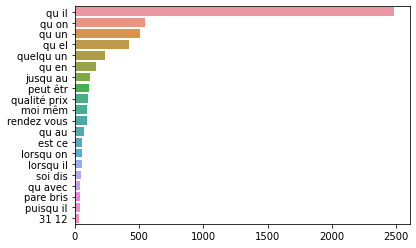

In [71]:
plot_top_ngrams_barchart(df['stemmed_avis'], 2)

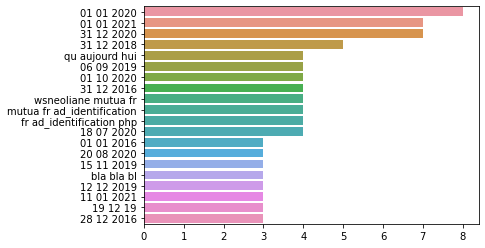

In [72]:
plot_top_ngrams_barchart(df['stemmed_avis'], 3)

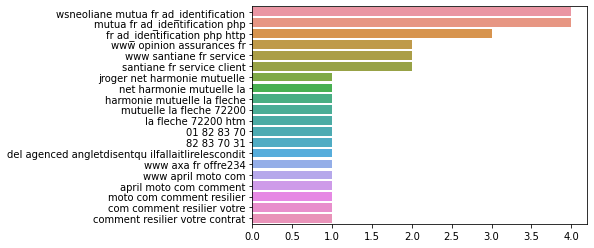

In [74]:
plot_top_ngrams_barchart(df['stemmed_avis'], 4)

#### Word clouds

In [ ]:
def wordcloud_for_star(star = 1): 
    wordcloud = df[df['note'] == star].processed_avis.tolist()
    wordcloud = [item for sublist in wordcloud for item in sublist]
    wordcloud = ' '.join(wordcloud)
    return wordcloud

In [ ]:
wordcloud_1 = WordCloud(background_color='white', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_star(star = 1))
wordcloud_2 = WordCloud(background_color='white', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_star(star = 2))
wordcloud_3 = WordCloud(background_color='white', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_star(star = 3))
wordcloud_4 = WordCloud(background_color='white', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_star(star = 4))
wordcloud_5 = WordCloud(background_color='white', stopwords=stop_words, min_font_size=10).generate(wordcloud_for_star(star = 5))

##### Reviews for 1 star

In [ ]:
# plot the WordCloud image  
pyplot.figure(figsize = (8, 8), facecolor = None)
pyplot.imshow(wordcloud_1)
pyplot.axis("off")
pyplot.tight_layout(pad = 0)
 
pyplot.show()

##### Reviews for 2 stars

In [ ]:
plot the WordCloud image  
pyplot.figure(figsize = (8, 8), facecolor = None)
pyplot.imshow(wordcloud_2)
pyplot.axis("off")
pyplot.tight_layout(pad = 0)
 
pyplot.show()

##### Reviews for 3 stars

In [ ]:
# plot the WordCloud image  
pyplot.figure(figsize = (8, 8), facecolor = None)
pyplot.imshow(wordcloud_3)
pyplot.axis("off")
pyplot.tight_layout(pad = 0)
 
pyplot.show()

##### Reviews for 4 stars

In [ ]:
# plot the WordCloud image  
pyplot.figure(figsize = (8, 8), facecolor = None)
pyplot.imshow(wordcloud_4)
pyplot.axis("off")
pyplot.tight_layout(pad = 0)
 
pyplot.show()

##### Reviews for 5 stars

In [ ]:
# plot the WordCloud image  
pyplot.figure(figsize = (8, 8), facecolor = None)
pyplot.imshow(wordcloud_5)
pyplot.axis("off")
pyplot.tight_layout(pad = 0)
 
pyplot.show()

In [67]:
words = df['stemmed_avis']
allwords = []
for wordlist in words:
    allwords += wordlist

#####  The 100 most common words

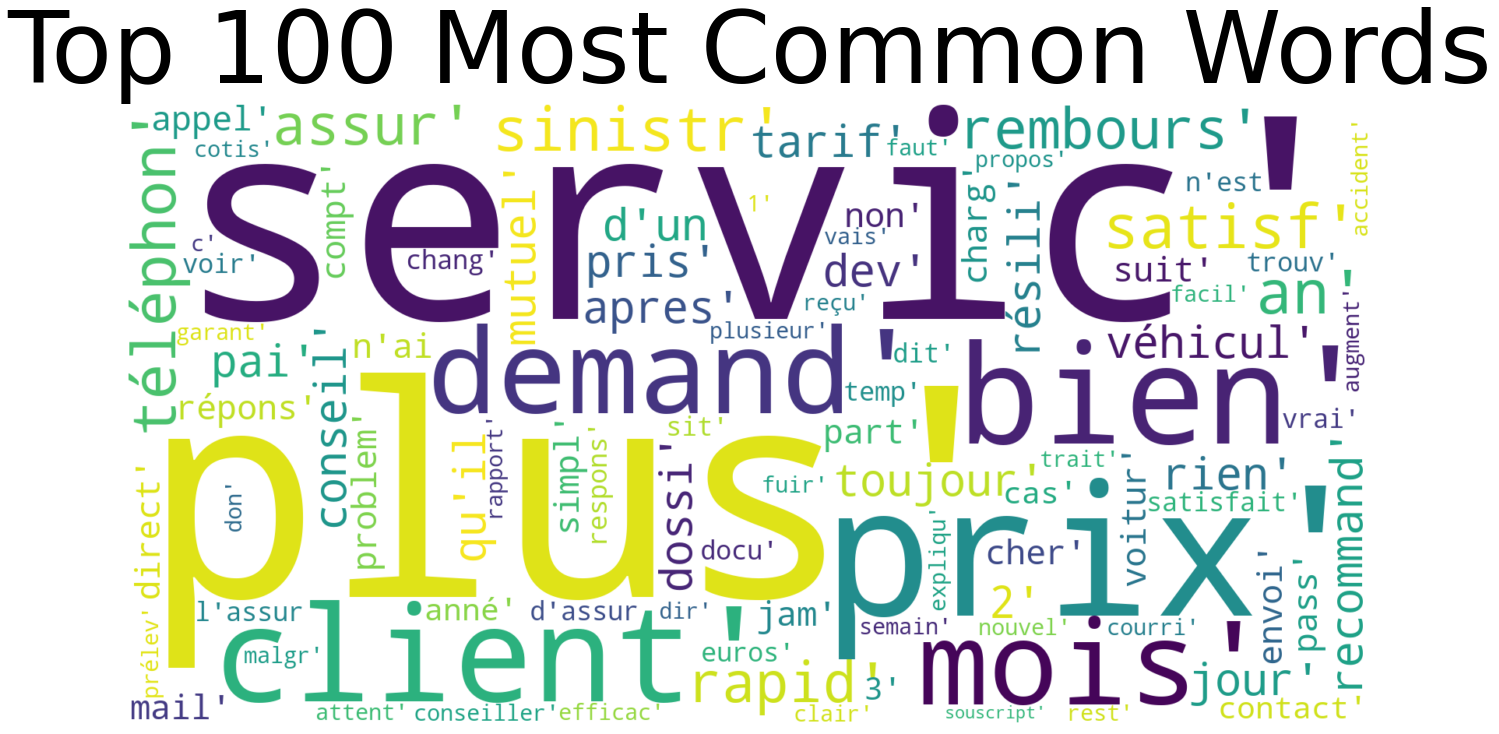

In [70]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))

fig = pyplot.figure(figsize=(30,10), facecolor='white')
pyplot.imshow(wordcloud, interpolation="bilinear")
pyplot.axis('off')
pyplot.title('Top 100 Most Common Words', fontsize=100)
pyplot.tight_layout(pad=0)

pyplot.show()

### Unsupervised Learning

#### Latent Dirichlet Allocation (LDA)

In [64]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

In [65]:
stemmed_count_vect = StemmedCountVectorizer(stop_words=stop_words)

In [66]:
lda_model_stemmed = Pipeline([
    ("vect", stemmed_count_vect),
    ("tfidf", TfidfTransformer()),
    ("lda", LDA(
            max_iter = 10,  # Max learning iterations
            learning_method = "online",
            random_state = 100,  # Random state
            batch_size = 128,  # n docs in each learning iter
            evaluate_every = -1,  # compute perplexity every n iters, default: Don't
            n_jobs = -1,  # Use all available CPUs
        ),
    )
])

In [81]:
df['str_stemmed_avis'] = df['stemmed_avis'].apply(lambda x : ' '.join(x))

lda_output = lda_model_stemmed.fit_transform(df['str_stemmed_avis'])
print(lda_model_stemmed)

Pipeline(steps=[('vect',
                 StemmedCountVectorizer(stop_words=['a', 'ai', 'aie', 'aient',
                                                    'aies', 'ait', 'alors',
                                                    'as', 'au', 'aucun', 'aura',
                                                    'aurai', 'auraient',
                                                    'aurais', 'aurait', 'auras',
                                                    'aurez', 'auriez',
                                                    'aurions', 'aurons',
                                                    'auront', 'aussi', 'autre',
                                                    'aux', 'avaient', 'avais',
                                                    'avait', 'avant', 'avec',
                                                    'avez', ...])),
                ('tfidf', TfidfTransformer()),
                ('lda',
                 LatentDirichletAllocation(learning_method='onlin

In [78]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=lda_model_stemmed.named_steps["vect"], lda_model=lda_model_stemmed.named_steps["lda"], n_words=25)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20,Word 21,Word 22,Word 23,Word 24
Topic 0,chaleur,génial,fluidit,téléconseil,10an,detail,maxim,benefici,empech,michel,...,corect,vitrag,iman,ramat,yamah,appliquent,rec,metr,enerv,ww
Topic 1,ford,prevu,toulous,donne,temsp,dure,alexandr,linst,tarf,amin,...,renbours,trèsbien,quit,toyot,dommang,sastifait,quelq,ahmed,hotel,deuch
Topic 2,compréhensibl,general,nickel,chauffeur,moin,imprim,respectu,quad,widad,attrai,...,intervent,supprim,pretext,nullissim,eh,hôtel,mercii,international,and,couvrent
Topic 3,pandem,pr,rc,vingt,embêt,malgres,soupless,dassur,dégress,zenup,...,des,cercl,1978,infernal,recus,avanssur,inintéress,éternel,reel,dematerialis
Topic 4,diminu,emelin,lami,personnalis,mme,furet,démarchag,éven,pap,com,...,idéal,instantan,clio,ristourn,procedur,chacun,you,beb,daoud,intérial
Topic 5,servic,prix,satisf,rapid,bien,recommand,client,tarif,téléphon,simpl,...,cher,direct,facil,efficac,sit,dev,écout,sinistr,voir,rapport
Topic 6,transact,téléconseiller,strict,contraign,martin,espagn,revoi,document,mel,francais,...,atout,succursal,bernard,représentent,niort,métropol,christin,différentiel,dom,périmetr
Topic 7,merc,vach,lait,alici,inflat,banqui,express,good,sarah,madam,...,he,qqch,anne,am,complementair,florenc,coquill,depuit,207,detaill
Topic 8,interfac,clart,gwendal,erik,carolin,compet,reactiv,recommend,mariam,interress,...,tré,lif,swiss,pneu,conçu,precedent,simplicit,belgiqu,ère,éfficac
Topic 9,mois,rembours,plus,an,résili,pai,sinistr,envoi,fuir,apres,...,mutuel,aucun,appel,rien,mail,respons,expert,euros,accident,jam


In [99]:
corpus=[]
for words in df['stemmed_avis']: 
    corpus.append(words)

C:\Users\cheic\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

C:\Users\cheic\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

C:\Users\cheic\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.038*"prix" + 0.037*"servic" + 0.028*"satisf" + 0.027*"rapid" + 0.016*"bien" + 0.016*"recommand" + 0.014*"tarif" + 0.013*"simpl" + 0.012*"satisfait" + 0.012*"téléphon"'),
 (1,
  '0.096*"’" + 0.014*"sinistr" + 0.013*"c" + 0.012*"expert" + 0.009*"maif" + 0.008*"charg" + 0.008*"plus" + 0.007*"bien" + 0.006*"pris" + 0.006*"assur"'),
 (2,
  '0.012*"plus" + 0.012*"mois" + 0.012*"demand" + 0.012*"rembours" + 0.009*"mutuel" + 0.008*"toujour" + 0.008*"dossi" + 0.007*"téléphon" + 0.007*"mail" + 0.007*"envoi"'),
 (3,
  '0.018*"plus" + 0.016*"véhicul" + 0.015*"an" + 0.015*"sinistr" + 0.012*"assur" + 0.011*"voitur" + 0.008*"respons" + 0.008*"%" + 0.007*"pai" + 0.007*"anné"')]

In [103]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\cheic\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
d:\programs\python\python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.038731  0.133191       1        1  41.432121
3     -0.062528  0.042551       2        1  27.193648
0      0.252463 -0.046459       3        1  20.632404
1     -0.151205 -0.129283       4        1  10.741827, topic_info=               Term         Freq        Total Category  logprob  loglift
441               ’  7050.000000  7050.000000  Default  30.0000  30.0000
3              prix  5893.000000  5893.000000  Default  29.0000  29.0000
23           satisf  3981.000000  3981.000000  Default  28.0000  28.0000
7            servic  7497.000000  7497.000000  Default  27.0000  27.0000
5             rapid  3806.000000  3806.000000  Default  26.0000  26.0000
25          sinistr  4208.000000  4208.000000  Default  25.0000  25.0000
6         recommand  2992.000000  2992.000000  Default  24.0000  24.0000
268         véhicul  3168.000000  3168.000000  Default  23.0000  23.0000
267           tarif  2766.000000  2766.000000  Default  22.0000  22.0000
242       satisfait  1700.000000  1700.000000  Default  21.0000  21.0000
288           simpl  2116.000000  2116.000000  Default  20.0000  20.0000
333               c  1250.000000  1250.000000  Default  19.0000  19.0000
48               an  4051.000000  4051.000000  Default  18.0000  18.0000
667           facil  1340.000000  1340.000000  Default  17.0000  17.0000
369          expert   918.000000   918.000000  Default  16.0000  16.0000
623         efficac  1208.000000  1208.000000  Default  15.0000  15.0000
39           voitur  2255.000000  2255.000000  Default  14.0000  14.0000
116               %  1501.000000  1501.000000  Default  13.0000  13.0000
26              sit  1651.000000  1651.000000  Default  12.0000  12.0000
12             bien  5151.000000  5151.000000  Default  11.0000  11.0000
28         téléphon  3894.000000  3894.000000  Default  10.0000  10.0000
839            mail  2054.000000  2054.000000  Default   9.0000   9.0000
874            maif   978.000000   978.000000  Default   8.0000   8.0000
573         augment  1194.000000  1194.000000  Default   7.0000   7.0000
258           assur  3421.000000  3421.000000  Default   6.0000   6.0000
38              tre   992.000000   992.000000  Default   5.0000   5.0000
617         respons  1695.000000  1695.000000  Default   4.0000   4.0000
292           clair  1162.000000  1162.000000  Default   3.0000   3.0000
149            mois  4507.000000  4507.000000  Default   2.0000   2.0000
367           envoi  2052.000000  2052.000000  Default   1.0000   1.0000
647           malad   487.384517   488.154148   Topic1  -6.3593   0.8795
1762         cardif   345.133856   345.843583   Topic1  -6.7044   0.8791
1908          déces   298.385482   299.118508   Topic1  -6.8500   0.8787
656          prévoi   275.312121   276.037712   Topic1  -6.9304   0.8785
304         médical   245.086720   245.804909   Topic1  -7.0467   0.8782
423          salair   225.776562   226.507009   Topic1  -7.1288   0.8779
4320              *   226.016685   226.748412   Topic1  -7.1277   0.8779
1775        invalid   219.233026   219.954553   Topic1  -7.1582   0.8778
2626           mgen   216.221799   216.989672   Topic1  -7.1720   0.8776
364       employeur   201.788838   202.507006   Topic1  -7.2411   0.8776
1780        médecin   297.012085   298.346223   Topic1  -6.8546   0.8766
709         dentair   149.159808   149.876022   Topic1  -7.5433   0.8763
814        raccroch   260.554974   261.808839   Topic1  -6.9855   0.8763
1055            cop   159.591771   160.364024   Topic1  -7.4757   0.8763
1573          déced   141.991686   142.702035   Topic1  -7.5926   0.8761
104         néolian   132.109811   132.832434   Topic1  -7.6647   0.8757
2244        capital   157.871828   158.765552   Topic1  -7.4866   0.8755
1709     hospitalis   127.113511   127.837522   Topic1  -7.7033   0.8754
746          demeur   128.992325   129.732708   Topic1  

#### Word2Vec

### Supervised Learning - Classification

####  Split train and test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.avis, df.note, test_size = 0.20)

#### Naive Bayes

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stop_words)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)

print(f"Accuracy on train : {text_clf.score(X_train, y_train)}")
print(f"Accuracy on test : {np.mean(text_clf.predict(X_test) == y_test)}")

In [ ]:
stemmed_count_vect = StemmedCountVectorizer(stop_words=stop_words)
text_mnb_stemmed = Pipeline([
    ('vect', stemmed_count_vect),
    ('tfidf', TfidfTransformer()),
    ('mnb', MultinomialNB(fit_prior=False)),
])
text_mnb_stemmed = text_mnb_stemmed.fit(X_train, y_train)
print(np.mean(text_mnb_stemmed.predict(X_test) == y_test))

#### Grid Search

In [ ]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
}

In [ ]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

print(gs_clf.best_score_)
print(gs_clf.best_params_)

print(f"Accuracy on train : {gs_clf.score(X_train, y_train)}")
print(f"Accuracy on test : {np.mean(gs_clf.predict(X_test) == y_test)}")

np.mean(gs_clf.predict(X_test) == y_test)

#### SVM

In [ ]:
text_clf_svm = Pipeline([
    ('vect', CountVectorizer(stop_words=stop_words)),
    ('tfidf', TfidfTransformer()),
    ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42))
])

_ = text_clf_svm.fit(X_train, y_train)

np.mean(text_clf_svm.predict(X_test) == y_test)

In [ ]:
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf-svm__alpha': (1e-2, 1e-3),
}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)

print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)
print(np.mean(gs_clf_svm.predict(X_test) == y_test))

#### RandomForest Classifier

In [ ]:
text_rfc_stemmed = Pipeline([
    ('vect', stemmed_count_vect),
    ('tfidf', TfidfTransformer()),
    ('rfc', RandomForestClassifier(n_estimators=400, max_depth=80)),
])

text_rfc_stemmed.fit(X_train, y_train)
text_rfc_stemmed.score(X_test, y_test)

### Supervised Learning - Regression

#### Linear regression

In [ ]:
text_linreg_stemmed = Pipeline([
    ('vect', stemmed_count_vect),
    ('tfidf', TfidfTransformer()),
    ('linreg', LinearRegression()),
])

text_linreg_stemmed = text_linreg_stemmed.fit(X_train, y_train)
print("Score: ", text_linreg_stemmed.score(X_test, y_test))
print("RMSE: ", mean_squared_error(y_test, text_linreg_stemmed.predict(X_test), squared=True))

#### RandomForest Regressor

In [ ]:
text_rfr_stemmed = Pipeline([('vect', stemmed_count_vect),
                     ('tfidf', TfidfTransformer()),
                     ('rfr', RandomForestRegressor()),
])
text_rfr_stemmed = text_rfr_stemmed.fit(X_train, y_train)

print("Score : ", text_rfr_stemmed.score(X_test, y_test))
print("RMSE: ", mean_squared_error(y_test, text_rfr_stemmed.predict(X_test), squared=True))

#### GridSearch on RandomForest

In [ ]:
param_grid = {
    'rfr__bootstrap': [False],
    'rfr__max_depth': [5, 10, 15, 25],
    'rfr__max_features': ['sqrt'],
    'rfr__min_samples_leaf': [1],
    'rfr__min_samples_split': [4],
    'rfr__n_estimators': [550, 600, 650]
}

grid_search = GridSearchCV(estimator = text_rfr_stemmed, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best RandomForestRegressor : ", grid_search.best_estimator_)
print("\nBest RandomForestRegressor score : ", grid_search.best_score_)
print("\nBest parameters : ", grid_search.best_params_)

#### Gradient Boosting Regressor

In [ ]:
text_gbr_stemmed = Pipeline([('vect', stemmed_count_vect),
                     ('tfidf', TfidfTransformer()),
                     ('gbr', GradientBoostingRegressor()),
])
text_gbr_stemmed = text_gbr_stemmed.fit(X_train, y_train)

print("Score : ", text_gbr_stemmed.score(X_test, y_test))
print("RMSE : ", mean_squared_error(y_test, text_gbr_stemmed.predict(X_test), squared=True))

In [ ]:
param_grid = {
    'gbr__max_depth': [10],
    'gbr__min_samples_split': [0.1],
    'gbr__min_samples_leaf': [1],
    'gbr__learning_rate': [0.1, 0.05, 0.01]
}
grid_search = GridSearchCV(estimator = text_gbr_stemmed, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best GradientBoostingRegressor : ", grid_search.best_estimator_)
print("\nBest GradientBoostingRegressor score : ", grid_search.best_score_)
print("\nBest parameters : ", grid_search.best_params_)